In [5]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import time

In [53]:
total_n = []
updates_n = []

In [39]:
total = []
only_updates = []

In [85]:
n = 1000000
n2 = 1000
unique = 100
data = np.array([str(i % unique) for i in range(n)]).reshape(-1, 1)

In [86]:
encoder = OrdinalEncoder()

In [87]:
start1 = time.perf_counter()
encoded_data = encoder.fit_transform(data)
end1 = time.perf_counter()
print(f"Time taken for init: {int((end1 - start1) * 1_000_000)}")
start2 = time.perf_counter()
for i in range(n2):
    data = np.vstack((data, np.array([str(i % unique)]).reshape(-1, 1)))
    encoded_data = encoder.fit_transform(data)
end2 = time.perf_counter()
t1 = int((end2 - start2) * 1_000_000)
t2 = int((end2 - start1) * 1_000_000)
print(f"Time taken for updates: {t1}") 
print(f"Time taken total: {t2}") 
total.append(t2)
only_updates.append(t1)

Time taken for init: 400984


KeyboardInterrupt: 

In [89]:
total, only_updates

([403955, 4340174, 38744970, 383196460], [51, 3925542, 38319646, 387449700])

In [90]:
total_n.append(total)
total = []

In [91]:
updates_n.append(only_updates)
only_updates = []

In [93]:
total_n, updates_n

([[9418, 64980, 434114, 4144353],
  [51077, 421887, 3748885, 38530310],
  [403955, 4340174, 38744970, 383196460]],
 [[97, 54821, 424482, 4139250],
  [50, 381084, 3702819, 38480527],
  [51, 3925542, 38319646, 387449700]])

In [94]:
sk = np.array(total_n)

In [95]:
dd = np.array([[19243, 20566, 27233, 73559],
[92656, 93723, 98875, 130481],
[817775, 880451, 903581, 933229]])

In [96]:
import matplotlib.pyplot as plt

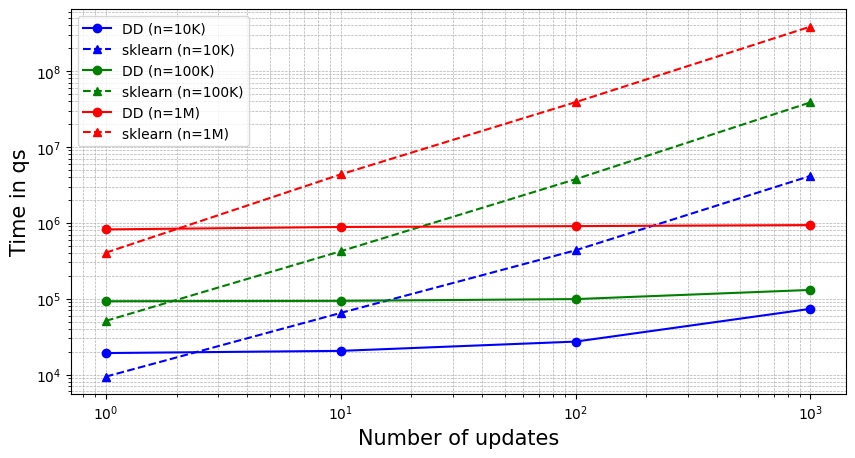

In [101]:
# Plotting
plt.figure(figsize=(10, 5))
n_values = [1, 10, 100, 1000]
init_vals = ["10K", "100K", "1M"]
markers = ['o', 's', 'D', '^', 'v']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink']


for i, n2 in enumerate(init_vals):
    plt.plot(n_values, dd[i], marker=markers[0], linestyle='-', color=colors[i], label=f'DD (n={n2})')
    plt.plot(n_values, sk[i], marker=markers[3], linestyle='--', color=colors[i], label=f'sklearn (n={n2})')

plt.xscale('log')  # Log scale for better visualization
plt.yscale('log')  # Log scale since values vary a lot
plt.xlabel('Number of updates', fontsize=15)
plt.ylabel('Time in qs', fontsize=15)
ax = plt.gca()
#ax.set_ylim([0, 871000000])
plt.legend(loc=2, prop={'size': 10})
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()
